importing libraries

## 1 Importando librerías 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


reading dataframe and checking data types

### 1.1 Leyendo dataframe y verificando tipos de datos

In [ ]:
df = pd.read_csv('games.csv')
df.info()

In [ ]:
df.head(5)

## 2 Preparando datos

### 2.1 Renombrando columnas a snake_case

In [ ]:
df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',
                   'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales',
                   'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'},inplace=True)

df.head(5)

### 2.2 Verificando columnas con valores NaN

In [ ]:
df[df['name'].isna()]

In [ ]:
df[df['platform'].isna()]

In [ ]:
df[df['year_of_release'].isna()]

In [ ]:
df[df['rating'].isna()]

In [ ]:
df[df['critic_score'].isna()]


In [ ]:
df[df['user_score'].isna()]

#### 2.2.1 Decidimos rellenar los valores NaN de la columna 'year_of_release' con el valor 2999 (fecha inexistente) para poder trabajar con los datos

In [ ]:
df['year_of_release'].fillna(2999,inplace=True)

In [ ]:
df[df['year_of_release'].isna()]

#### 2.2.2 Decidimos eliminar los dos registros que no cuentan con el campo "name" y pertenecen a la plataforma "GEN"debido a que no nos sirven para nuestro estudio, al igual que representan una cantidad muy pequeña de datos que no generará resultados tendenciosos

In [ ]:
df=df[~df['name'].isna()]
df.info()

In [ ]:
#Revisando valores tbd
#df[df.isin(['tbd']).any(axis=1)]

### 2.2.3 Decidimos rellenar los valores NaN de la columna 'rating' con el valor 'UN' (Undetermined), no sería inteligente eliminarlos debido a que son representativos para el estudio.

In [ ]:
df['rating'].fillna('UN',inplace=True)
df[df['rating'].isna()]

### 2.2.4 Decidimos rellenar los valores NaN de la columna 'critic_score' con el valor numérico 105, esto debido a que es un valor fuera de rango (0-100) y de esta manera podemos filtrarlo para omitirlos en caso de ser necesario, sin perder la posibilidad de analizar el resto de su información, que puede ser representativa para el estudio.

In [ ]:
df['critic_score'].fillna(105,inplace=True)
df[df['critic_score'].isna()]

### 2.2.4 Decidimos rellenar los valores NaN de la columna 'user_score' con el valor numérico 11, esto debido a que es un valor fuera de rango (0-10) y de esta manera podemos filtrarlo para omitirlos en caso de ser necesario, sin perder la posibilidad de analizar el resto de su información, que puede ser representativa para el estudio.

In [ ]:
df['user_score'].fillna(11,inplace=True)
df[df['user_score'].isna()]

### 2.3 Verificando que no tengamos ningún valor NaN restante en el DataFrame, así como la información del mismo

In [ ]:
df.isna().any()

In [ ]:
df.info()

#### 2.3.1 Cambiando el tipo de dato de la columna 'year_of_release' de tipo  flotante (float64) por  entero (int)

In [ ]:
df['year_of_release']= df['year_of_release'].astype(int)

In [ ]:
df.info()

### 2.4 Verificando valores 'To Be Determined' en columna 'user_score'

##### 2.4.1 Verificando a que años pertenecen los videojuegos con calificación 'To Be Determined'

In [ ]:
#Revisando valores tbd
df_tbd =df[df.isin(['tbd']).any(axis=1)]
df_tbd.groupby('year_of_release')['user_score'].count()

#####  Los valores To be determined en la columna 'user_score' indican que el videojuego no ha recibido sufucientes reseñas por parte de los usuarios para calcular una calificiación promedio, por lo tanto los mantendremos con ese valor

### 2.5 Calculando las ventas totales para cada juego

In [ ]:
#df[df['name']=='Wii Sports']
df ['total_sales']= df['na_sales'] + df['eu_sales'] +df['jp_sales'] + df['other_sales']
df


## 3 Analizando los datos

In [ ]:
df.head()

### 3.1 ¿Cuántos juegos fueron lazados en diferentes años?

In [ ]:
game_years_df= df.groupby('year_of_release')['name'].count().reset_index()
game_years_serie= df.groupby('year_of_release')['name'].count()


game_years_df.drop(game_years_df.loc[game_years_df['year_of_release']==2999].index)
game_years_df.rename(columns={'name':'games_released'},inplace=True)
game_years_df.head()

In [ ]:
#game_years_df.plot(kind='bar', x='year_of_release', y='name')
plt.figure(figsize=(20,10))
sns.barplot(x='year_of_release',y='games_released',data=game_years_df)
plt.xlabel('Year of release')
plt.ylabel('Games released')
#sns.set_theme(rc={'figure.figsize':(10,7)})

In [ ]:
max=game_years_serie.idxmax()
min=game_years_serie.idxmin()
print(f"el año con menor cantidad de juegos lanzados fue {game_years_df.loc[game_years_df['year_of_release']==min]['year_of_release'].values[0]}, la cantidad de juegos lanzados en ese año fue {game_years_df.loc[game_years_df['year_of_release']==min]['games_released'].values[0]} juegos")
print()
print(f"el año con menor cantidad de juegos lanzados fue {game_years_df.loc[game_years_df['year_of_release']==max]['year_of_release'].values[0]}, la cantidad de juegos lanzados en ese año fue {game_years_df.loc[game_years_df['year_of_release']==max]['games_released'].values[0]} juegos")

In [ ]:
df_1980=df[df['year_of_release']==1980]
df_1980.head()

In [ ]:
print("la cantidad de plataformas que existían en el 2008 eran: ",len(df_1980.platform.unique()))
print(f"Las ventas totales del videojuego más popular en 2008 fueron: { round(df_1980['total_sales'].max(), 2) } Millones de dólares")

In [ ]:
df_2008=df[df['year_of_release']==2008]
df_2008.head()

In [ ]:
print("la cantidad de plataformas que existían en el 2008 eran: ",len(df_2008.platform.unique()))
print(f"Las ventas totales del videojuego más popular en 2008 fueron: { round(df_2008['total_sales'].max(), 2) } Millones de dólares")

Podemos observar que:
* La cantidad de juegos lanzados en 1980 solamente se lanzaron 9 juegos, estos solo fueron lanzados en la plataforma 'Atari 2600'
* En 2008 se lanzaron 2008 juegos en 9 plataformas diferentes, entre ellas: 'Wii, X360, PS3, DS' etc.


* La cantidad de ventas totales del juego más popular en 1980 fue de 4.31 Millones de dólares
* La cantidad de ventas totales del juego más popular en 2008 fue de 35.52 Millones de dólares

    * A comparación de 1980, en 2008 juego más popular obtuvo 8.24 veces más ingresos que su contraparte en 1980

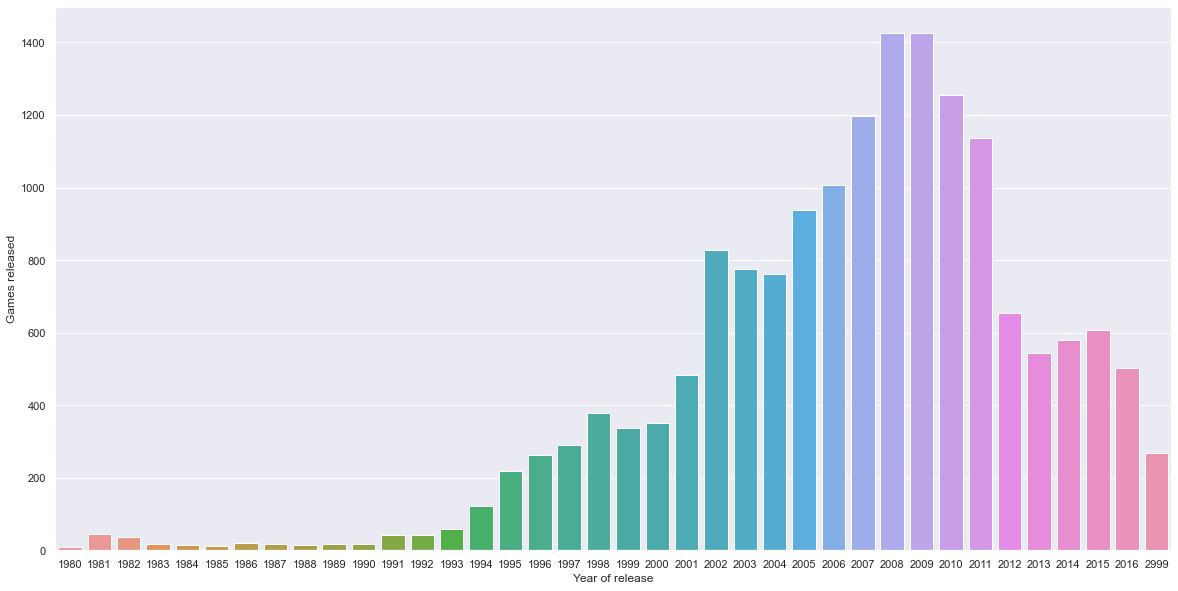

### 3.2 ¿Cómo varian las ventas de una plataforma a otra?  

*Comparativa año con año*

In [ ]:
platform_group = df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
print(len(platform_group))
platform_group.reset_index(drop=True,inplace=True)
platform_group

In [ ]:
#las 5 plataformas con mayores ventas históricas
platform_top=platform_group.head(10)
platform_top=platform_top[~platform_top['platform'].isin(['PSP','PS4','GBA'])]
platform_top.reset_index(drop=True,inplace=True)
platform_top

In [ ]:
platform_top_list=platform_top['platform'].to_list()
print(platform_top_list)
test1 = df[df['platform'].isin(platform_top_list)]
test1.groupby(['platform','year_of_release'])['year_of_release'].sum()

#df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

In [ ]:
df[df['platform']=='DS'].sort_values(by='year_of_release')

### 3.2.1 Observamos que el videojuego 'Strongest Tokyo University Shogi DS	' tiene inconsistencias, según la base de datos fue lanzado para la plataforma 'DS' en 1985, sin embargo corroborando en datos online observamos que el juego fue lanzado en Mayo de 2007, por lo tanto corregiremos el dato y continuaremos con el análisis

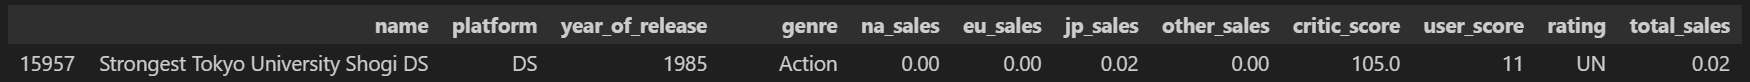

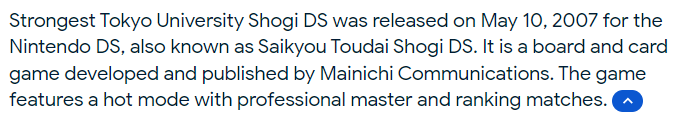

In [ ]:
#df[df['name']=='Strongest Tokyo University Shogi DS']['year_of_release'] = 2007
df.loc[15957,'year_of_release'] = 2007
df[df['name']=='Strongest Tokyo University Shogi DS']


### 3.2.3 Regresamos al análisis de las ventas por plataforma

In [ ]:
print(platform_top_list)
test1 = df[df['platform'].isin(platform_top_list)]
t1 = test1.groupby(['platform','year_of_release'])['year_of_release'].sum()
t1

In [ ]:
t1['DS']

In [ ]:
t2= pd.DataFrame(t1)
t2.rename(columns={'year_of_release':'total_sales'},inplace=True)
t2.reset_index(inplace=True)
t2.head(10)
#t2.set_index('year_of_release')


In [ ]:
t2[t2['platform']=='DS'].head()

In [ ]:
#sns.displot(kind='hist',data=t2, x='year_of_release',y='total_sales')
#fig ,axs = plt.subplots(3,2, figsize=(10,10))
#['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

fig = plt.figure(figsize=(23,15))
fig.suptitle('Games sales year by year by Platform')
fig.set_facecolor("white")


ax1=fig.add_subplot(231)
sns.barplot(data=t2[t2['platform']=='PS2'], ax=ax1, x='year_of_release',y='total_sales')
ax1.title.set_text('PS2')
ax1.set_ylabel('Total sales (MM)')
ax1.set_xlabel('Year of release')


ax2=fig.add_subplot(232)
sns.barplot(data=t2[t2['platform']=='X360'], ax=ax2, x='year_of_release',y='total_sales')
ax2.title.set_text('X360')
ax2.set_ylabel('Total sales (MM)')
ax2.set_xlabel('Year of release')


ax3=fig.add_subplot(233)
sns.barplot(data=t2[t2['platform']=='PS3'], ax=ax3, x='year_of_release',y='total_sales')
ax3.title.set_text('PS3')
ax3.set_ylabel('Total sales (MM)')
ax3.set_xlabel('Year of release')


ax4=fig.add_subplot(234)
sns.barplot(data=t2[t2['platform']=='Wii'], ax=ax4, x='year_of_release',y='total_sales')
ax4.title.set_text('Wii')
ax4.set_ylabel('Total sales (MM)')
ax4.set_xlabel('Year of release')

ax5=fig.add_subplot(235)
sns.barplot(data=t2[t2['platform']=='DS'], ax=ax5, x='year_of_release',y='total_sales')
ax5.title.set_text('DS')
plt.ticklabel_format(style='plain', axis='y')

ax5.set_ylabel('Total sales (MM)')
ax5.set_xlabel('Year of release')

ax6=fig.add_subplot(236)
sns.barplot(data=t2[t2['platform']=='PS'], ax=ax6, x='year_of_release',y='total_sales')
ax6.title.set_text('PS')
plt.ticklabel_format(style='plain', axis='y')

ax6.set_ylabel('Total sales (MM)')
ax6.set_xlabel('Year of release')

#sns.barplot(data=t2[t2['platform']=='DS'], ax=axs[0,1], x='year_of_release',y='total_sales')
#axs[0,1].plot(t2)

añadimos la plataforma PC debido a que es la plataforma que más años ha permanecido en el mercado

In [ ]:
plt.figure(figsize=(15,10))
fig.set_facecolor("white")
sns.barplot(x='year_of_release',y='total_sales',data=t2[t2['platform']=='PC'])
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('PC sales year by year')

Investigación previa de las plataformas:
* El Sony PS2 fue lanzado en Marzo del 2000
* El Nintendo DS fue lanzado en Noviembre de 2004
* El Xbox 360 fue lanzado en Noviembre de 2005
* El Nintendo Wii fue lanzado en Noviembre de 2006
* El Sony PS3 fue lanzado en Noviembre de 2006
* El Sony PS fue lanzado en Septiembre de 1995


Conforme a la investigación previa de las plataformas aunado a el análisis realizado podemos observar que:
* La plataforma con mayor cantidad de ventas históricas fue el Nintendo DS con cerca de 988 mil millones de dólares en el 2008
* La segunda plataforma con mayor cantidad de ventas históricas fue el Nintendo Wii con cerca de 653 mil millones de dólares en 2009

Considerando los años de lanzamiento de las plataformas (previamente descritos) podemos concluir que:
* El primer año a partir del lanzamiento de las plataformas, no suelen existir demasiadas ventas, esto puede deberse a;
    * La cantidad de juegos que existan desarrollados al momento sean pocos
    * Los usuarios van ganando confianza a través de las reseñas comunitarias (usuarios y críticos)
    * El precio de las plataformas recién lanzadas suele ser elevado
    * Errores de desarrollo que se irán parchando conforme avance el tiempo
* El auge de las plataformas suele ser incremental y durar aproximadamente entre 5 y 6 años para después comenzar a decaer, esto puede deberse a:
    * La cantidad de juegos desarrollados va en aumento
    * Reducción de errores de desarrollo (Parches)
    * Estabilización de los precios de la plataforma y sus títulos
    * Sólida confianza de los usuarios construida
* El ocaso de las plataformas suele verse entre los 6 y 9 años después de su lanzamiento, exceptuando al nintendo Wii que se desvaneció 5 años después de su lanzamiento

* La plataforma que tuvo estabilidad en ventas por más años fue el PS2

* La plataforma con mayor cantidad de ventas en el año de lanzamiento fue el PS2 con cerca de 170,000 millones de dólares
* La plataforma con menor cantidad de ventas en el año de lanzamiento fue el PS con cerca de 33,000 millones de dólares

* Las plataformas con un mejor ingreso al mercado (conforme a su comportamiento de ventas a partir del año 2 ) en orden fueron:
    * PS2
    * Wii
    * DS
    * X360
    * PS3
    * PS
    * PC

**Notas del investigador:**

*La plataforma PC fue añadida en este grupo de top plataformas debido a que ha permanecido en el mercado por mayor cantidad de años, si bien su comportamiento no responde al mismo ciclo de vida de las demás plataformas, sus ventas han sido considerables*

*El año 2999 fue etiquetado solo como referencia de videojuegos que no cuentan con información sobre su año de lanzamiento sin embargo pueden representar una cantidad considerable de ventas globales*



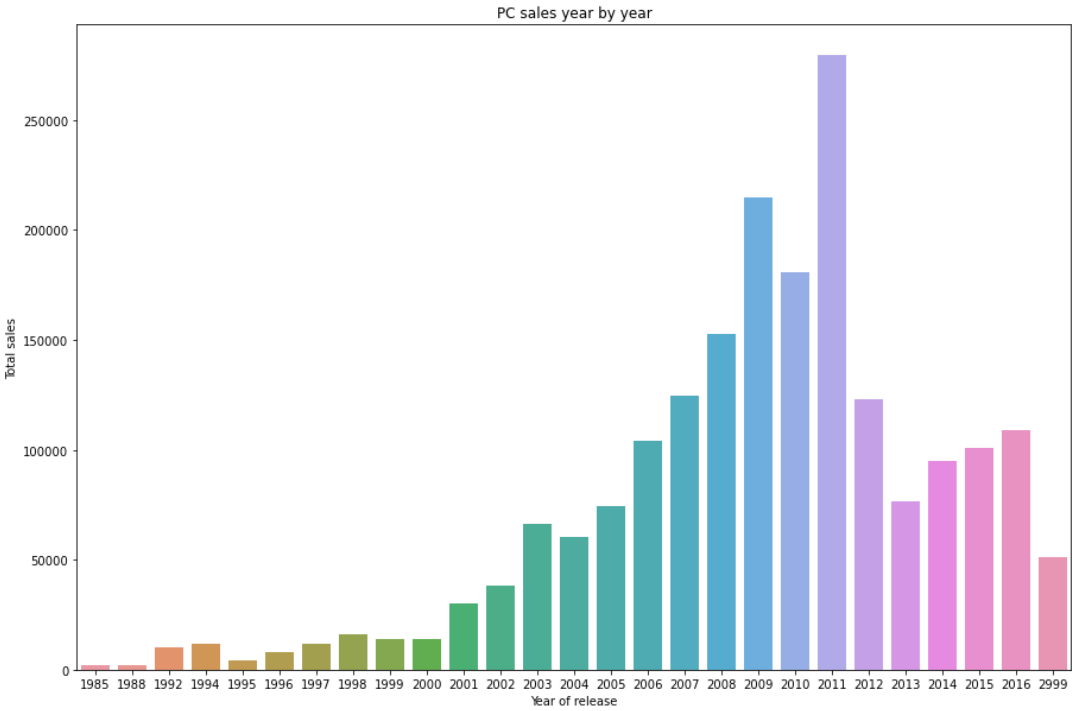

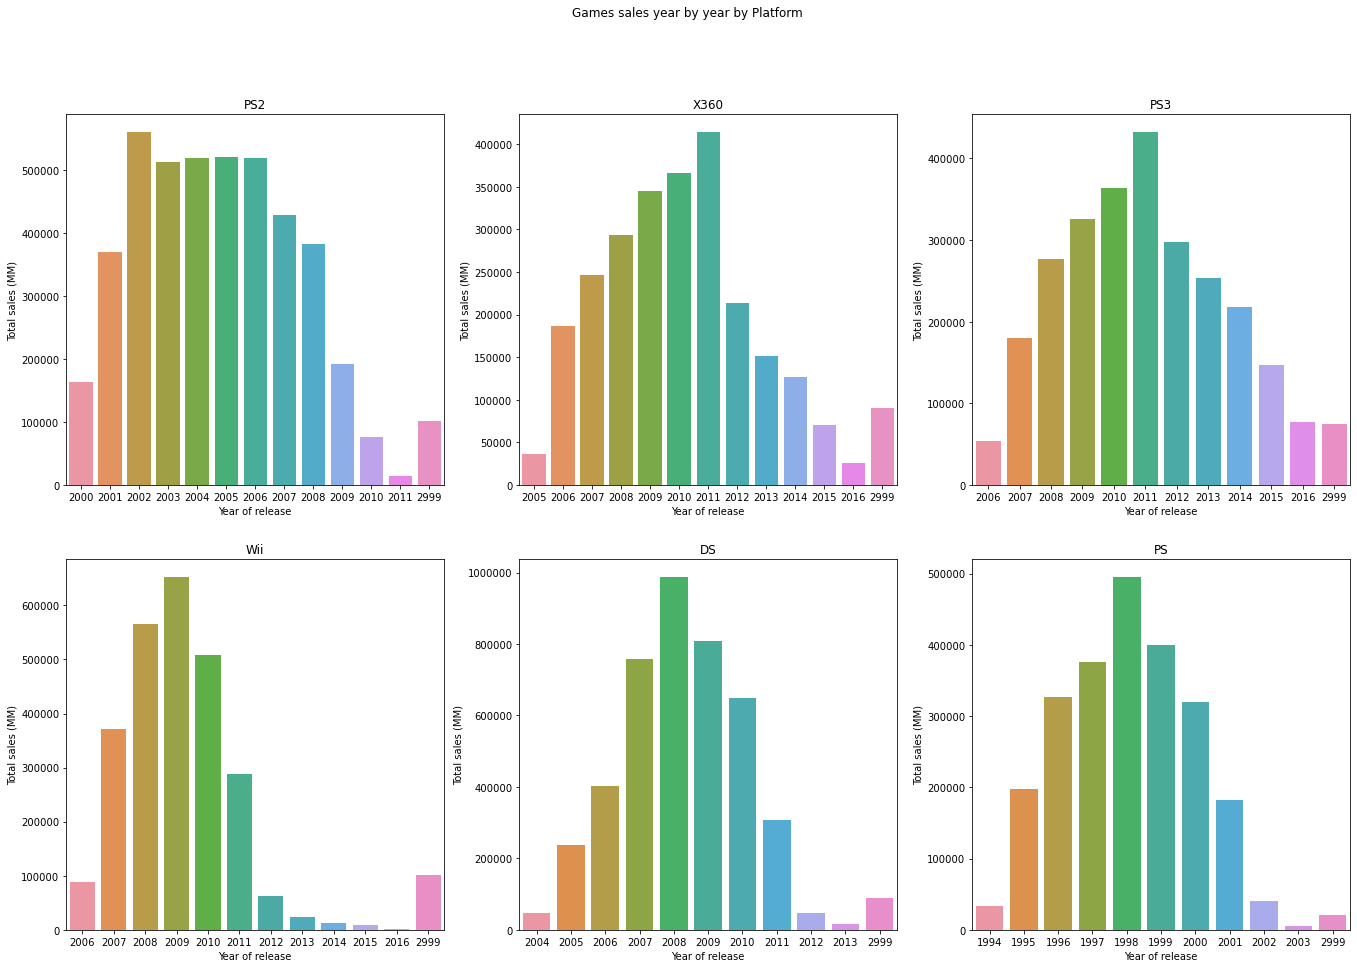

**Plataformas que solían ser populares y ahora no tienen ventas**

¿Cuánto tardan generalmente las nuevas en aparecer y las antiguas en desaparecer?

**Con base a los datos anteriores podemos verificar que el ciclo de vida de las consolas es de 9 años, por lo tanto vamos a trabajar con los datos de los últimos 9 años para poder determinar nuestro modelo para el 2017**


### 3.3 Analizando ¿Qué plataformas son lideres en ventas? ¿Cuáles crecen y cuáles se reducen?

eligiendo plataformas potencialmente rentables

*Para esta tarea se localizaron las top 6 plataformas por década basado en sus ventas totales y añadimos la plataforma PC debido a que es la plataforma que más años ha permanecido en el mercado*

In [ ]:
#p_list=t2.platform.unique()
#p_list

In [ ]:
#Filtrando por videojuegos lanzados después del 2006
df2 =df[df['year_of_release']>2006]
df2=df2[df2['year_of_release']!=2999]
df2.head()

In [ ]:
#Filtrando las plataformas más vendidas en los últimos 9 años
#guardando en una lista
top_10_plat =df2.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_10_plat=top_10_plat.head(10)

top_10_plat_df=pd.DataFrame(top_10_plat).reset_index()
top_10_plat_list = top_10_plat_df['platform'].unique()
top_10_plat_list


In [ ]:
#Filtrando el df con la lista de top 10 plataformas más vendidas en los últimos 9 años
top_10= df2[df2['platform'].isin(top_10_plat_list)]
top_10.head()


In [ ]:
#creando una tabla pivote para poder gráficar la sumatoria de ventas por plataforma
pivot_df= top_10.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
pivot_df
#pivot_df.T


In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax=sns.lineplot(data=pivot_df, markers=True,palette='hls')
ax.set_xticks(pivot_df.index)
ax.set_title('Platform total sales based on last 9 years')
ax.set_xlabel('Year')
ax.set_ylabel('Sales in MM')


Podemos observar que:
* La plataforma lider en ventas en el 2016 es el PS4 con un aproximado de 70 Millones de dólares en ventas seguida por el XONE con un aproximado de 35 millones de dólares en ventas
* la plataforma PC si bien no lidera las ventas, mantiene un flujo estable a través de los años, oscilando entre los 10 y 35 millones de dólares en ventas
Dentro de las plataformas que en los últimos 9 años han perdido drásticamente su fuerza podemos observar:
* Nintendo Wii pasó de superar los 200 millones de dólares a practicamente menos de 1 millon de dólares en ventas
* X360 pasó de tener cerca de 160 millones de dólares a 1 millon de dólares en ventas

En los últimos 9 años observamos que  de las 10 plataformas principales que existían, solamente 3 (PS4, XONE, 3DS y PC) siguen con ventas activas, sin embargo de estas últimas ya se observa el ocaso del 3DS

Para las 3 plataformas restantes que siguen activas (PS4, XONE y PC) es posibloe que los datos del 2016 no estén del todo completos y por eso observemos que sus ventas hayan caído drásticamente, no tendríamos información suficiente para determinar si la causa de la caída en ventas es la falta de información o el ocaso del ciclo de vida de la plataforma.

con la información previa podemos entonces determinar que **las plataformas líderes en ventas son PS4, XONE y PC**

## 3.4 Ventas globales de todos los videojuegos por plataforma
Creando un diagrama de caja para representar las ventas globales de todos los videojuegos por plataforma

**¿Son significativas las diferencias en ventas?**

**¿Qué sucede con las ventas promedio en varias plataformas?**

In [108]:
#df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [ ]:
#df.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum')

top_7 = df[df['year_of_release']>2006]
#top_7 = top_7[~top_7['year_of_release']==2999]

#top_7

top_7= top_7[top_7['year_of_release']!=2999]
#top_7 = top_7[top_7['platform'].isin(p_list)]

top_7
# top_7['platform'].unique()



# pivot_df= top_7.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
# pivot_df.T


In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax=sns.lineplot(data=pivot_df)
ax.set_xticks(pivot_df.index)
ax.set_title('Platform total sales based on last 9 years')
ax.set_xlabel('Year')
ax.set_ylabel('Sales in MM')


In [ ]:
#plt.plot(kind='lineplot',data=t2)
#t2_unmelted= 
#t2.T
#t2
t3=t2.pivot(index='platform',columns=['total_sales'])
#t3
t3.reset_index(inplace=True)
t3.T
#sns.lineplot(data=t3, x='platform')

# 5 Zona de pruebas

In [ ]:
#df.groupby('platform')['year_of_release'].count()
platform_list= df['platform'].unique()

plat_test=df[df['platform'].isin(platform_list)]
plat_test_serie=plat_test.groupby(['platform','year_of_release'])['year_of_release'].sum()

plat_test_serie
#type(plat_test)
plat_test_df= pd.DataFrame(plat_test_serie)
plat_test_df.rename(columns={'year_of_release':'total_sales'},inplace=True)
plat_test_df.reset_index(inplace=True)
#plat_test_df= plat_test_df[plat_test_df['year_of_release']<2000]
plat_test_df


In [ ]:
platforms_to_drop=['DS','PS2', 'PS3','Wii','X360']
plat_test_df=plat_test_df[~plat_test_df['platform'].isin(platforms_to_drop)]
plat_test_df.sort_values(by='year_of_release',inplace=True)

In [ ]:
plat_test_df

Analizando el resto de las plataformas observamos que:
* A diferencia de las plataformas con mayor cantidad de ventas, las plataformas lanzadas antes del 2000 solían tener un auge de 3 años y un ocaso de 2 a 3 años, dando un ciclo de vida de aproximadamente 5 a 6 años
* 